**MNIST**

MNIST är ett standarddataset inom maskininlärning som används för att träna och testa
algoritmer för bildigenkänning. Det består av 70 000 gråskalebilder av handskrivna siffror
(0–9), där varje bild är 28×28 pixlar

**LADDAR IN BIBLIOTEK och funktioner**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.datasets import fetch_openml

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import math

# Skapar en funktion som vi använder senare
def display_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm).plot()


In [ ]:

mnist = fetch_openml("mnist_784", version = 1, cache = True, as_frame = False)  # Vi laddar in MNIST datasetet, det är ett dataset som innehåller bilder av handskrivna siffror. Det finns 70000 bilder i datasetet, varje bild är 28x28 pixlar och representeras som en vektor med 784 pixlar. Varje bild har en etikett/label som anger vilken siffra det är (0-9).
print(mnist.DESCR)                                                              # Vi skriver ut en beskrivning av datasetet för att få en bättre förståelse av vad det innehåller och hur det är strukturerat. Det är alltid bra att förstå datasetet innan man börjar arbeta med det.

X = mnist["data"].astype(float)                                                 # Vi tar ut datan, det är en matris med 70000 rader och 784 kolumner. Varje rad representerar en bild och varje kolumn representerar en pixel i bilden.
X = X / 255.0
y = mnist["target"].astype(np.uint8)                                            # Vi tar ut etiketterna/labels, det är en vektor med 70000 element. Varje element är en siffra mellan 0 och 9 som anger vilken siffra bilden föreställer.
print(X.shape)                                                                  # Vi ser att 70000 observationer och 784 oberoende variabler
print(y.shape)                                                                  # Vi ser att 70000 observationer och 1 beroende variabel

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.  

With some classification methods (particularly template-based methods, such as SVM and K-nearest neighbors), the error rate improves when the digits are centered by bounding box rather than center of mass. If you do this kind of pre-processing, you should report it in your publications. The MNIST database was constructed from NIST's NIST originally designated SD-3 as their training set and SD-1 as their test set. However, SD-3 is much cleaner and easier to recognize than SD-1. The reason for this can be found on the fact that SD-3 was collected among Census Bureau employees, while SD-1 was collected among high-school students. Drawing sensible conclusions from learning experiments requires that the result be independent of the choice of training set and test among the complete set of samples. Therefore it was necessary to build a new database by mixing NIST's datasets.  

The MNIST training set is composed of 30,000 patterns from SD-3 and 30,000 patterns from SD-1. Our test set was composed of 5,000 patterns from SD-3 and 5,000 patterns from SD-1. The 60,000 pattern training set contained examples from approximately 250 writers. We made sure that the sets of writers of the training set and test set were disjoint. SD-1 contains 58,527 digit images written by 500 different writers. In contrast to SD-3, where blocks of data from each writer appeared in sequence, the data in SD-1 is scrambled. Writer identities for SD-1 is available and we used this information to unscramble the writers. We then split SD-1 in two: characters written by the first 250 writers went into our new training set. The remaining 250 writers were placed in our test set. Thus we had two sets with nearly 30,000 examples each. The new training set was completed with enough examples from SD-3, starting at pattern # 0, to make a full set of 60,000 training patterns. Similarly, the new test set was completed with SD-3 examples starting at pattern # 35,000 to make a full set with 60,000 test patterns. Only a subset of 10,000 test images (5,000 from SD-1 and 5,000 from SD-3) is available on this site. The full 60,000 sample training set is available.

Downloaded from openml.org.

**EDA**

Vi skapar en DataFrame av X_train så att det är lättare att arbeta med. Vi kommer att använda denna DataFrame för EDA

In [41]:
Xtrain_df = pd.DataFrame(X_train)                                                              
ytrain_df =pd.DataFrame(y_train)                                                                    

Eftersom vissa siffror förekommer fler gånger än andra. Till exempel har klassen 1 6277 exempel medan 5 bara har 5040. Det innebär att vissa klasser är överrepresenterade och andra underrepresenterade, vilket kan påverka hur modellen lär sig.

En modell som inte tar hänsyn till detta kan bli lite snedvriden mot de vanligare klasserna, vilket gör att den gissar rätt oftare för de frekventa siffrorna och fel oftare för de mindre frekventa.

Åtgärder kan inkludera att använda stratifierad split vid träning/test, eventuellt viktning i modellens loss-funktion, eller resampling/metoder för att balansera datasetet, men för MNIST är obalansen ganska mild och påverkar oftast inte prestandan dramatiskt eftersom alla klasser ändå har tusentals exempel.

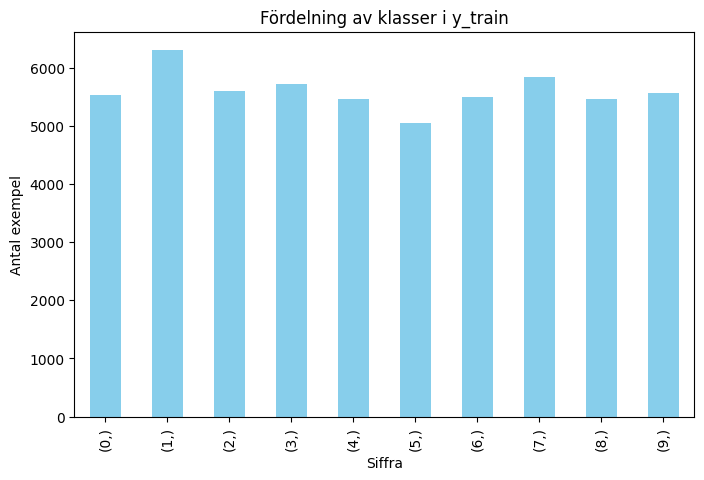

In [42]:
ytrain_df.value_counts().sort_index().plot(kind='bar', color='skyblue', figsize=(8,5))
plt.xlabel("Siffra")
plt.ylabel("Antal exempel")
plt.title("Fördelning av klasser i y_train")
plt.show()


Jag ser att det finns 256 unika värden i X, det är pixelvärdena som kan vara mellan 0 och 255. 0 betyder att pixeln är svart och 255 betyder att pixeln är vit. Värden mellan 0 och 255 representerar olika nyanser av grått.. Går det att använda denna information till något nyttigt?

In [6]:
np.unique(X)                                                                    # Vi ser att det finns 256 unika värden i X, det är pixelvärdena som kan vara mellan 0 och 255. 0 betyder att pixeln är svart och 255 betyder att pixeln är vit. Värden mellan 0 och 255 representerar olika nyanser av grått.

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Med hjälp av tidigare information så skapar jag en transformer som delar alla pixelvärden i en bildmatris med 255, vilket omvandlar varje värde från intervallet 0–255 till intervallet 0–1. Detta används för att normalisera bilddatan innan den matas in i en modell, så att alla funktioner får samma skala och algoritmen blir stabilare och oftast tränar snabbare.

Vi ser att det finns 10 unika värden i y, det är siffrorna 0-9. De har datatypen object, alltså strängar.

In [17]:
np.unique(y)                                                                    

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Vi konverterar Y till heltal så det inte är strängar längre. Detta gör det lättare att jobba med

In [16]:
y = mnist["target"].astype(np.uint8)                                           # Vi konverterar y till heltal så att det inte är strängar längre, det gör det lättare att arbeta med.

True label for the plotted image is 5


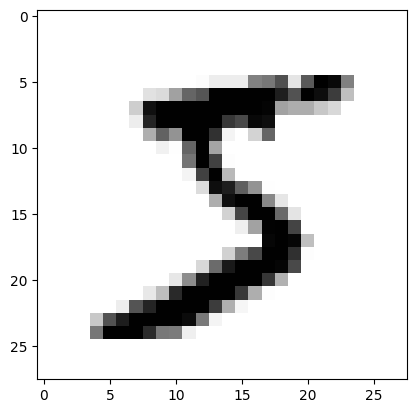

In [9]:
# gör några inspektioner för att få en känsla för den data vi har att arbeta med

some_digit = X[0]                                           # Vi tar ut den första bilden i datasetet, det är en vektor med 784 pixlar
some_digit_image = some_digit.reshape(28,28)                # Vi omformar vektorn till en 28x28 matris så att det kan visualiseras som en bild
plt.imshow(some_digit_image, cmap=mpl.cm.binary)            # Visualiserar en bild, vi ser att det ser ut som en femma
print("True label for the plotted image is", y[0])          # Vi skriver ut bildens etikett/label. Det är en femma

**MODELLERING**

**Train test split**

Jag delar upp datan i träning, validering och test. Vi använder stratify=y så att fördelningen av klasserna i y är lika i alla delmängderna. Jag vill att alla delmängderna ska ha en liknande fördelning av klasserna så att modellen inte tränas på ett snedvridet dataset. Det kan vara bra vid korsvalidering.

**Skapar pipelines**

In [ ]:
scaler = StandardScaler()
logreg_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
et_clf = ExtraTreesClassifier()
scale_255 = FunctionTransformer(lambda x: x / 255.0)  # Skapar en transformer som skalar pixelvärdena till intervallet [0, 1]


**Logistisk regression**

In [4]:
# Pipeline med FunctionTransformer istället för StandardScaler
logreg_pipe = Pipeline([
    ("scale", scale_255),
    ("model", logreg_clf)
])

# GridSearch hyperparametrar
logreg_params = {
    "model__C": [1, 10],
    "model__solver": ["lbfgs"],
    "model__max_iter": [1000]
}

# GridSearchCV
logreg_grid = GridSearchCV(
    logreg_pipe,
    logreg_params,
    cv=5,
    n_jobs=-1,
    scoring="accuracy"
)

# Träna
logreg_grid.fit(X_train, y_train)

# Visa resultat
print("Bästa parametrar:", logreg_grid.best_params_)
print("CV-score:", logreg_grid.best_score_)


Bästa parametrar: {'model__C': 1, 'model__max_iter': 1000, 'model__solver': 'lbfgs'}
CV-score: 0.9207678571428571


**Support Vector Machine (SVC)**

In [5]:

# Pipeline: scaling → PCA → SVM
svm_pipe = Pipeline([
    ("scale", scale_255),  # Skala pixelvärdena till [0, 1]
    ("pca", PCA(n_components=50)),  # antal komponenter kan vi söka över
    ("model", SVC(probability=True, random_state=42))
])

# GridSearch hyperparametrar
svm_params = {
    "pca__n_components": [50],     # antal PCA-komponenter
    "model__kernel": ["rbf"],
    "model__gamma": ["scale", 0.01],           # bara ett värde för snabbhet
    "model__C": [10]
}

# GridSearchCV
svm_grid = GridSearchCV(
    svm_pipe,
    svm_params,
    cv=5,
    n_jobs=-1,
    scoring="accuracy"
)

# Träna
svm_grid.fit(X_train, y_train)
best_svm_params = svm_grid.best_params_
# Visa resultat
print("Bästa parametrar:", svm_grid.best_params_)
print("CV-score:", svm_grid.best_score_)


Bästa parametrar: {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf', 'pca__n_components': 50}
CV-score: 0.9853392857142858


**KNN**

In [6]:
# Pipeline: scaling → PCA → KNN
knn_pipe = Pipeline([
    ("scale", scale_255),  # Skala pixelvärdena till [0, 1]
    ("pca", PCA()),           
    ("model", KNeighborsClassifier(n_jobs=-1))  # Parallel processing
])

# **OPTIMERADE hyperparametrar
knn_params = {
    "pca__n_components": [60],                 
    "model__n_neighbors": [3],                  
    "model__weights": ["distance"],             
    "model__metric": ["euclidean"],             
    "model__p": [1],
    "model__algorithm": ["ball_tree"]
    
}

# GridSearchCV
knn_grid = GridSearchCV(
    knn_pipe,
    knn_params,
    cv=3,
    n_jobs=-1,
    scoring="accuracy",
    verbose=1
)

# Träna
knn_grid.fit(X_train, y_train)

# Visa resultat
print("Bästa parametrar KNN:", knn_grid.best_params_)
print("CV-score (train):  ", f"{knn_grid.best_score_:.4f}")
print("Test-score:        ", f"{knn_grid.score(X_test, y_test):.4f}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Bästa parametrar KNN: {'model__algorithm': 'ball_tree', 'model__metric': 'euclidean', 'model__n_neighbors': 3, 'model__p': 1, 'model__weights': 'distance', 'pca__n_components': 60}
CV-score (train):   0.9748
Test-score:         0.9775


**Random Forest**

In [7]:
# Random Forest Pipeline och Grid Search
rf_pipe2 = Pipeline([   
    ("scale", scale_255),  # Skala pixelvärdena till [0, 1]    
    ("model", RandomForestClassifier(random_state=42, n_jobs=-1))
])

# **FULL hyperparameter grid för MNIST**
rf_params2 = {
    "model__n_estimators": [300],                
    "model__max_depth": [None],                   
    "model__min_samples_split": [2],             
    "model__min_samples_leaf": [1],              
    "model__max_features": ["sqrt"],            
    "model__bootstrap": [True],                   
    "model__criterion": ["gini"]      
}

rf_grid2 = GridSearchCV(
    rf_pipe2, 
    rf_params2, 
    cv=3,           
    n_jobs=-1,       
    scoring="accuracy",
    verbose=1
)

rf_grid2.fit(X_train, y_train)
best_rf_params2 = rf_grid2.best_params_

print("Bästa RF-parametrar:", best_rf_params2)
print("CV-score:", f"{rf_grid2.best_score_:.4f}")
print("Test-score:", f"{rf_grid2.score(X_test, y_test):.4f}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Bästa RF-parametrar: {'model__bootstrap': True, 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 300}
CV-score: 0.9673
Test-score: 0.9687


**Extra tree**

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
import numpy as np


# Pipeline för ExtraTrees (ExtraTrees älskar rå pixeldata!)
et_pipe = Pipeline([
    ("scale", scale_255),  # Skala pixelvärdena till [0, 1]
    ("model", ExtraTreesClassifier(random_state=42, n_jobs=-1))
])

# Hyperparameter grid för ExtraTrees
et_param_grid = {
    'model__n_estimators': [200],           # ExtraTrees behöver FLER träd!
    'model__max_depth': [None],              # Ofta unlimited är bäst
    'model__min_samples_split': [2],             # Minimal split för max detalj
    'model__min_samples_leaf': [1],              # Exakta leafs
    'model__max_features': ['sqrt'],             # √784 ≈ 28 features = perfekt
    'model__bootstrap': [False],                 # False är ExtraTrees signatur!
    'model__criterion': ['gini']      # entropy kan ge edge
}

# GridSearchCV
et_grid = GridSearchCV(
    et_pipe, 
    et_param_grid, 
    cv=3,                    
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Träna ExtraTrees
et_grid.fit(X_train, y_train)

print("Bästa ET-parametrar:", et_grid.best_params_)
print("CV Accuracy:         ", f"{et_grid.best_score_:.4f}")
print("Test Accuracy:       ", f"{et_grid.score(X_test, y_test):.4f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Bästa ET-parametrar: {'model__bootstrap': False, 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
CV Accuracy:          0.9698
Test Accuracy:        0.9718


Jag valde bort Logistisk regression och random forest till min voting classifier eftersom de kommer bara dra ner accuracy score. LogReg hade 92 och RF hade ca 96.5. Jag testar köra voting med KNN, SVM och Extra trees.

In [9]:
best_et = et_grid.best_estimator_
best_svc = svm_grid.best_estimator_
best_knn = knn_grid.best_estimator_


Eftersom Random Forest och ExtraTrees är så lika, så kan det vara intressant att se hur de presterar i en ensemble tillsammans med SVM och KNN. Jag skapar en VotingClassifier som kombinerar dessa modeller. Eftersom SVM är med så har jag ställt in den på voting soft.

In [10]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ("knn", best_knn),
        ("et", best_et),
        ("svc", best_svc)
    ],
    voting="soft"
)

voting_clf.fit(X_train, y_train)


,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('knn', ...), ('et', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"func func: callable, default=NoneThe callable to use for the transformation. This will be passedthe same arguments as transform, with args and kwargs forwarded.If func is None, then func will be the identity function.",<function <la...001A978788B80>
,"inverse_func inverse_func: callable, default=NoneThe callable to use for the inverse transformation. This will bepassed the same arguments as inverse transform, with args andkwargs forwarded. If inverse_func is None, then inverse_funcwill be the identity function.",None
,"validate validate: bool, default=FalseIndicate that the input X array should be checked before calling``func``. The possibilities are:- If False, there is no input validation.- If True, then X will be converted to a 2-dimensional NumPy array or sparse matrix. If the conversion is not possible an exception is raised... versionchanged:: 0.22 The default of ``validate`` changed from True to False.",False
,"accept_sparse accept_sparse: bool, default=FalseIndicate that func accepts a sparse matrix as input. If validate isFalse, this has no effect. Otherwise, if accept_sparse is false,sparse matrix inputs will cause an exception to be raised.",False
,"check_inverse check_inverse: bool, default=TrueWhether to check that or ``func`` followed by ``inverse_func`` leads tothe original inputs. It can be used for a sanity check, raising awarning when the condition is not fulfilled... versionadded:: 0.20",True


In [11]:
# Utvärdera alla modeller på testdata
models = [best_knn, best_et, best_svc, voting_clf]
model_names = ["K Nearest Neighbors", "Extra Trees", "SVC", "Voting Classifier"]

print("Accuracy on test set:")
for name, model in zip(model_names, models):
    score = model.score(X_test, y_test)
    print(f"{name:20s}: {score:.4f}")


Accuracy on test set:
K Nearest Neighbors : 0.9775
Extra Trees         : 0.9718
SVC                 : 0.9859
Voting Classifier   : 0.9859


Här genomför jag en felanalys av flera klassificeringsmodeller genom att jämföra deras förutsägelser på testdatan. Först genereras prediktioner från KNN, Extra Trees, SVC och en Voting Classifier. Därefter identifieras vilka observationer som varje modell klassificerar fel och både antal och andel fel skrivs ut.

Slutligen analyseras vilka siffror som oftast klassificeras fel av de två bästa modellerna genom att räkna fel per klass. Detta ger en tydlig bild av modellernas prestanda och vilka typer av siffror som är svårast att känna igen.

In [12]:
# === FELANALYS ===
print("\n" + "="*60)
print("FELANALYS - VOTING CLASSIFIER")
print("="*60)

# Få förutsägelser från alla modeller
knn_pred_test = best_knn.predict(X_test)
et_pred_test = best_et.predict(X_test) 
svc_pred_test = best_svc.predict(X_test)
voting_pred_test = voting_clf.predict(X_test)

# Hitta fel för varje modell
knn_errors = np.where(knn_pred_test != y_test)[0]
et_errors = np.where(et_pred_test != y_test)[0]
svc_errors = np.where(svc_pred_test != y_test)[0]
voting_errors = np.where(voting_pred_test != y_test)[0]

print(f"Antal fel - KNN:  {len(knn_errors):4d} ({100*len(knn_errors)/len(y_test):.1f}%)")
print(f"Antal fel - Extra Trees:    {len(et_errors):4d} ({100*len(et_errors)/len(y_test):.1f}%)")
print(f"Antal fel - SVC:           {len(svc_errors):4d} ({100*len(svc_errors)/len(y_test):.1f}%)")
print(f"Antal fel - Voting:        {len(voting_errors):4d} ({100*len(voting_errors)/len(y_test):.1f}%)")

# SVC
print(f"\nFel per klass (SVC):")
unique_s, counts_s = np.unique(y_test[svc_errors], return_counts=True)
for klass, antal in zip(unique_s, counts_s):
    print(f"  Siffra {klass}: {antal} fel")

# Analysera vilka klasser som är svåra
print(f"\nFel per klass (Voting Classifier):")
unique, counts = np.unique(y_test[voting_errors], return_counts=True)
for klass, antal in zip(unique, counts):
    print(f"  Siffra {klass}: {antal} fel")



FELANALYS - VOTING CLASSIFIER
Antal fel - KNN:   315 (2.2%)
Antal fel - Extra Trees:     395 (2.8%)
Antal fel - SVC:            198 (1.4%)
Antal fel - Voting:         197 (1.4%)

Fel per klass (SVC):
  Siffra 0: 5 fel
  Siffra 1: 13 fel
  Siffra 2: 16 fel
  Siffra 3: 25 fel
  Siffra 4: 23 fel
  Siffra 5: 27 fel
  Siffra 6: 13 fel
  Siffra 7: 25 fel
  Siffra 8: 20 fel
  Siffra 9: 31 fel

Fel per klass (Voting Classifier):
  Siffra 0: 4 fel
  Siffra 1: 11 fel
  Siffra 2: 22 fel
  Siffra 3: 29 fel
  Siffra 4: 29 fel
  Siffra 5: 21 fel
  Siffra 6: 14 fel
  Siffra 7: 16 fel
  Siffra 8: 27 fel
  Siffra 9: 24 fel


Här skapar jag klassificeringsrapporter för de två bästa modellerna med precision, recall och F1-score för varje klass, vilket ger en mer detaljerad bild av modellernas prestanda för varje siffra (0–9).

In [13]:
# Detaljerad rapport för (VotingClassifier)
print("\n" + "="*50)
print("Detailed evaluation - Voting Classifier")
print("="*50)

y_pred = voting_clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Detailed evaluation - Voting Classifier
Test Accuracy: 0.9859285714285714

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1381
           1       0.99      0.99      0.99      1575
           2       0.99      0.98      0.99      1398
           3       0.99      0.98      0.98      1428
           4       0.99      0.98      0.98      1365
           5       0.98      0.98      0.98      1263
           6       0.99      0.99      0.99      1375
           7       0.98      0.99      0.99      1459
           8       0.99      0.98      0.99      1365
           9       0.97      0.98      0.98      1391

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



In [14]:
# Detaljerad rapport för (SVC)
print("\n" + "="*50)
print("Detailed evaluation - Voting Classifier")
print("="*50)

y_pred = best_svc.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Detailed evaluation - Voting Classifier
Test Accuracy: 0.9858571428571429

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1381
           1       0.99      0.99      0.99      1575
           2       0.99      0.99      0.99      1398
           3       0.99      0.98      0.99      1428
           4       0.98      0.98      0.98      1365
           5       0.99      0.98      0.98      1263
           6       0.99      0.99      0.99      1375
           7       0.98      0.98      0.98      1459
           8       0.99      0.99      0.99      1365
           9       0.98      0.98      0.98      1391

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



Följer upp med confusionmatrix för de två modellerna. Jag börjar luta mer mot SVC än votingclassifier

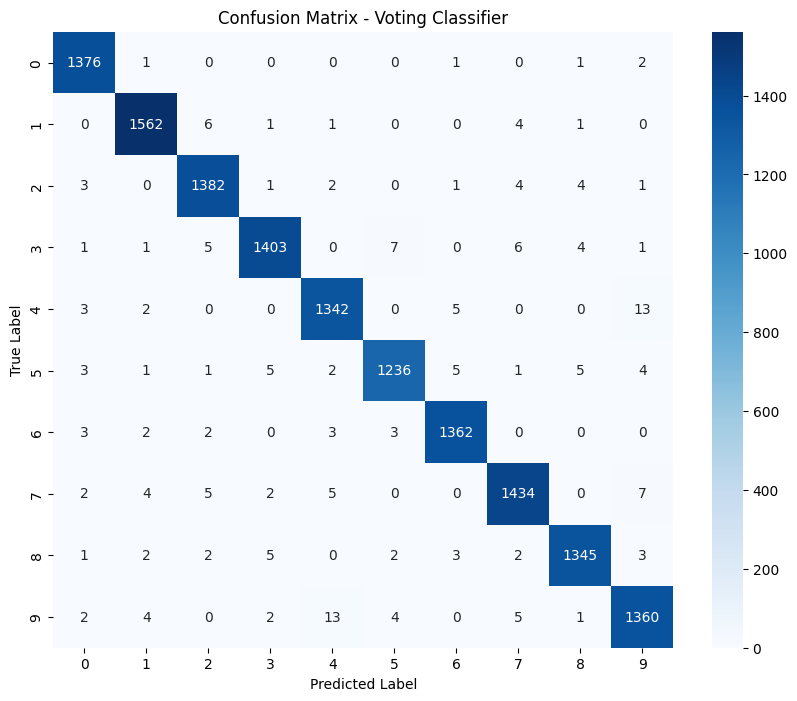

In [15]:
# 3. Förvirringsmatris (bra för MNIST)

import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Voting Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Vi ser att modellen gör flest misstag på siffrorna 4 och 9, vilket är vanligt i MNIST eftersom de ser ganska lika ut. Det är också intressant att se att det finns en del förväxlingar mellan 3 och 5, vilket också är vanligt. Svc gör ett bra jobb med att skilja mellan dessa klasser, men det finns fortfarande en del misstag. Det är också värt att notera att det finns några förväxlingar mellan 7 och 9, vilket kan bero på att vissa handskrivna 7:or kan se ut som 9:or. Overall, modellen presterar mycket bra på MNIST, men det finns fortfarande några utmanande siffror som kan förbättras ytterligare. SVC har lite mer balanserad felgissning på 4 och 9 jämfört med voting classifier.

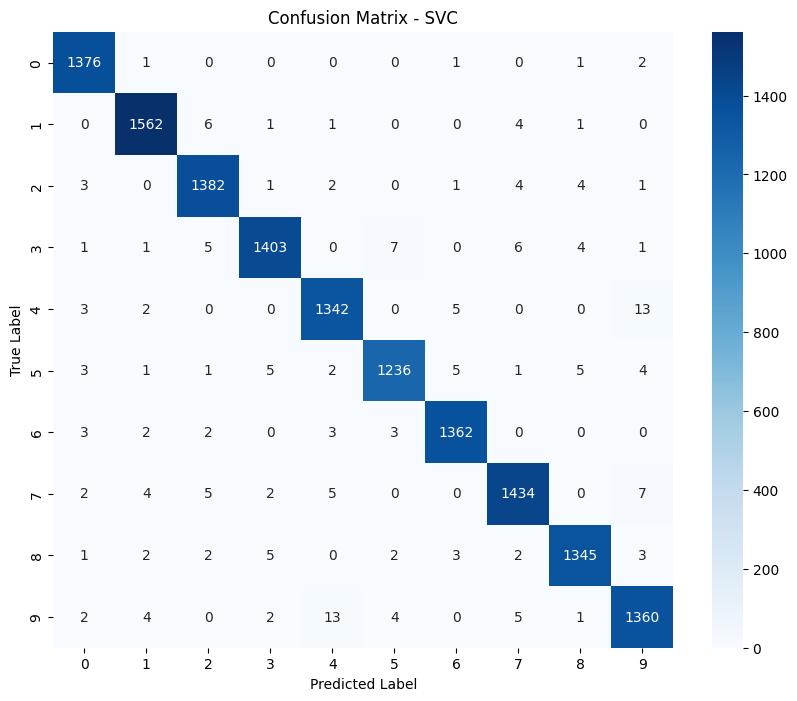

In [16]:
# Förutsägelser från SVC
y_pred = best_svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVC')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Jag gör en visuell felanalys för SVC-modellen genom att identifiera alla testexempel där modellen förväxlat siffrorna 4 och 9. Den räknar ut antalet sådana misstag och visar dem i ett rutnät av subplotar, där varje bild representerar ett felklassificerat exempel med prediktion och verklig etikett, så att man enkelt kan se vilka siffror modellen har svårt att skilja åt. Vissa nior ser croppade ut och en del lutar. Detta hade säkert gått att åtgärda. Om bilderna är croppade, sneda eller inte helt centrerade, kan det påverka modellens förmåga att korrekt identifiera siffrorna, särskilt för SVM och KNN.

Med hjälp av centrering kan man räkna ut bildens tyngdpunkt och flytta siffran så att tyngdpunkten ligger exakt i mitten av bilden. Med hjälp av deskewing kan man räta till siffrorna. Detta är extra viktigt för siffror som “6” och “9” eller “4” och “7”, där lutning kan orsaka förväxlingar.

Antal förväxlingar mellan 4 och 9: 26


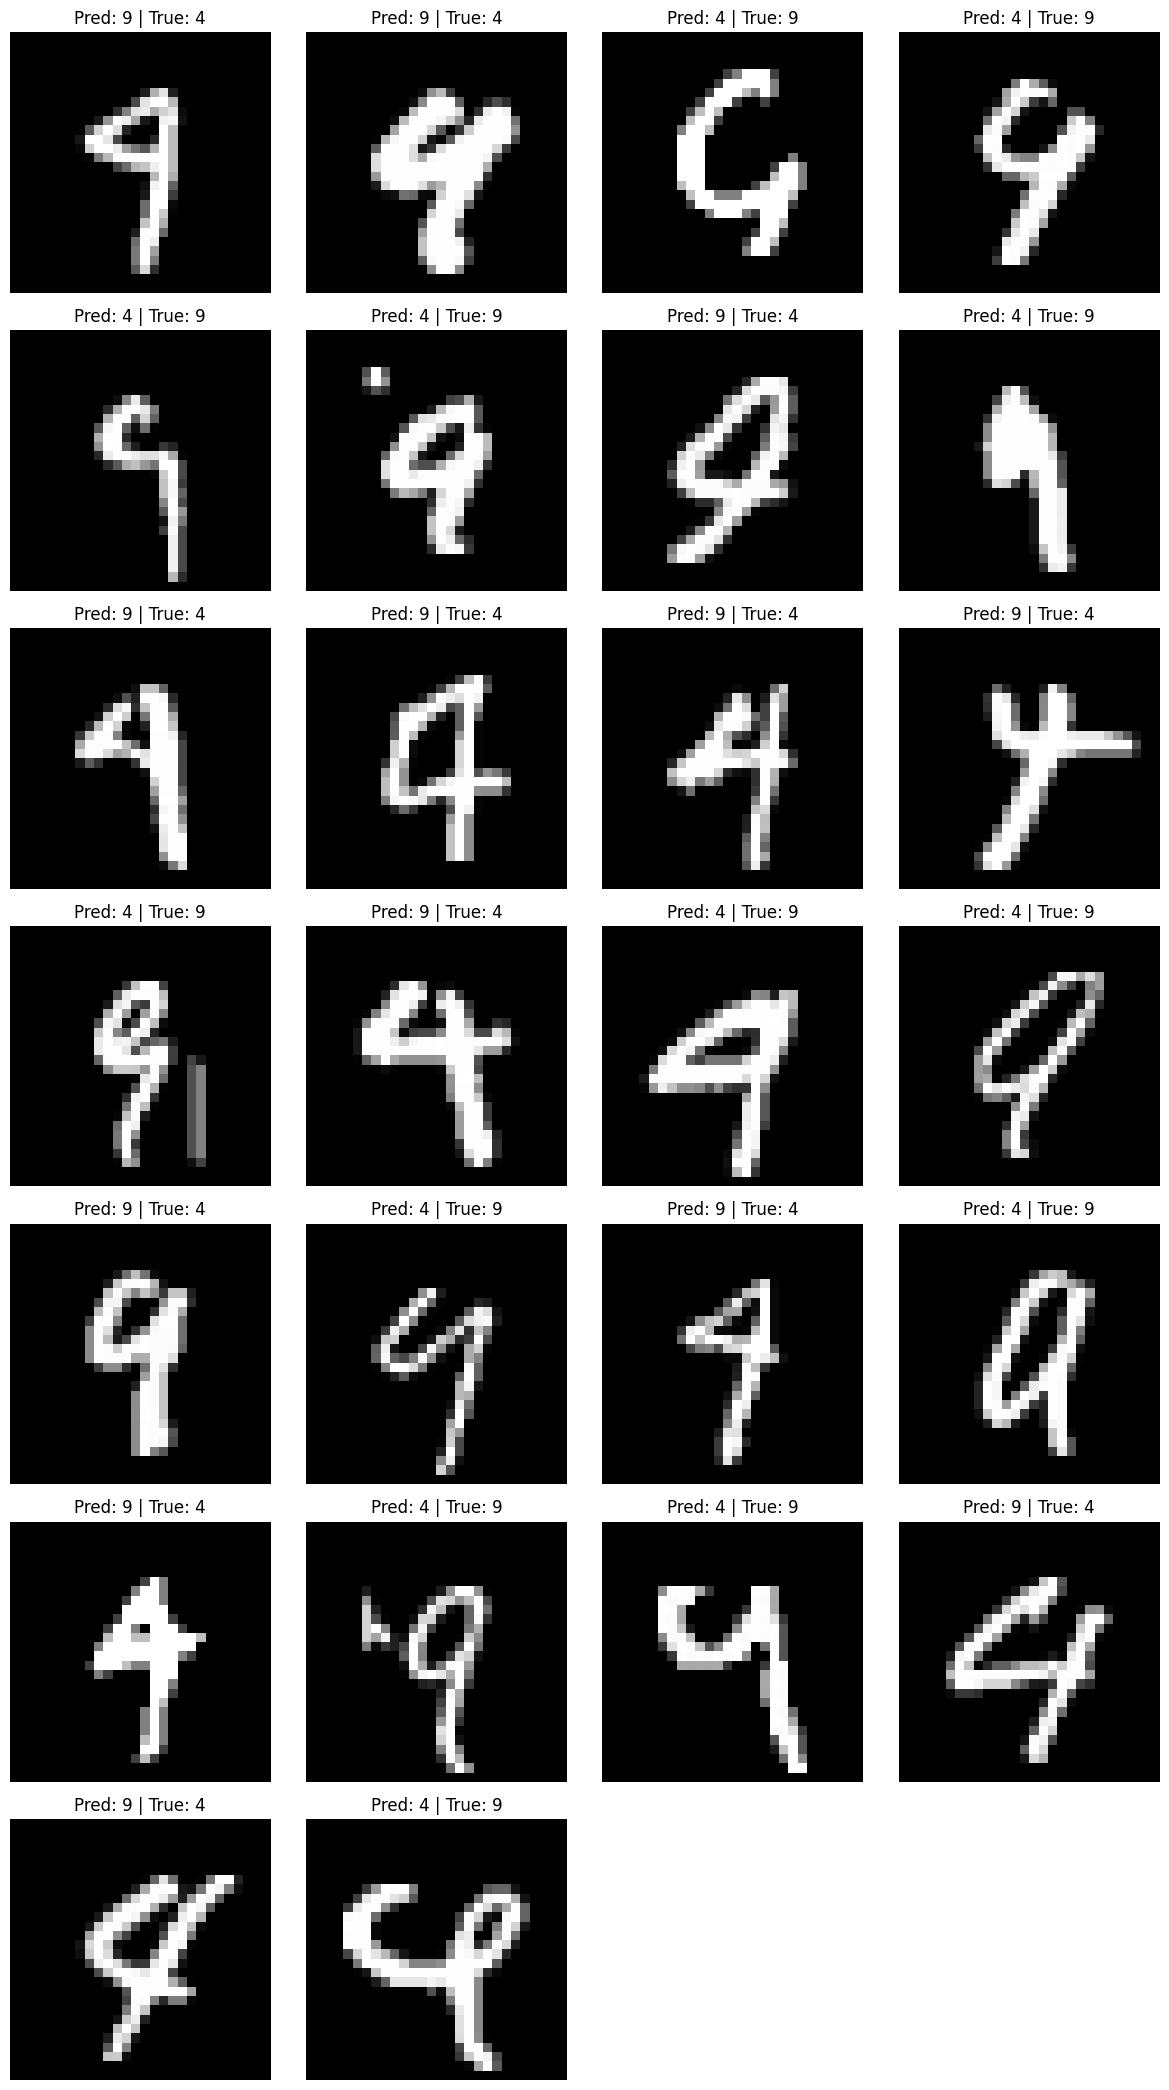

In [17]:
a, b = 4, 9
mask = ((y_test == a) & (svc_pred_test == b)) | ((y_test == b) & (svc_pred_test == a))
idxs = np.where(mask)[0]

print(f"Antal förväxlingar mellan {a} och {b}:", len(idxs))

n = len(idxs)
cols = 4                       # antal kolumner du vill ha
rows = math.ceil(n / cols)      # räkna ut antal rader automatiskt

plt.figure(figsize=(cols*3, rows*3))
for i, idx in enumerate(idxs):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {svc_pred_test[idx]} | True: {y_test[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


Både SVC-modellen och Voting Classifier gav mycket hög noggrannhet på MNIST-datan, men skillnaden mellan dem var minimal (endast en felklassificerad bild). Eftersom Voting-modellen är mer komplex att spara, ladda och använda i en applikation, är SVC ett mer praktiskt val utan att förlora prestanda. Därför valdes SVC som slutlig modell för implementation i en Streamlit-app, då den kombinerar hög accuracy med enkelhet och stabilitet.

In [19]:
# Spara bästa modellen
import joblib
joblib.dump(best_svc, 'best_svc_mnist_final.pkl')
print("Modell sparad som 'best_svc_mnist_final.pkl'")

Modell sparad som 'best_svc_mnist_final.pkl'
